## Kaggle Titanic Machine Learning project

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#checking NaNs
print(df['Sex'].isna().sum())
print(df['Embarked'].isna().sum())
print(df['Age'].isna().sum())
print(df['SibSp'].isna().sum())
print(df['Parch'].isna().sum())
print(df['Pclass'].isna().sum())
print(df['Fare'].isna().sum())
print(df['Name'].isna().sum())
print(df['Cabin'].isna().sum())
print(df['Ticket'].isna().sum())

0
2
177
0
0
0
0
0
687
0


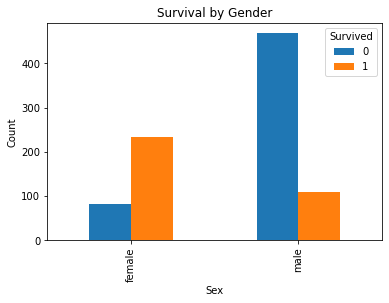

In [4]:
grouped = df.groupby(['Sex', 'Survived']).size().unstack()

# Create a bar plot
grouped.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival by Gender')

# Show the plot
plt.show()

In [5]:
df = df.dropna(subset=['Age'])
df = df.dropna(subset=['Embarked'])

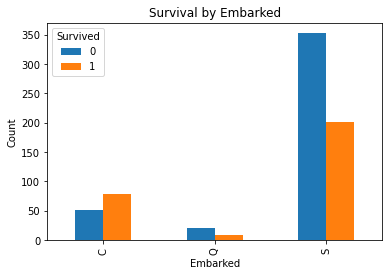

In [6]:
grouped = df.groupby(['Embarked', 'Survived']).size().unstack()

# Create a bar plot
grouped.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival by Embarked')

# Show the plot
plt.show()

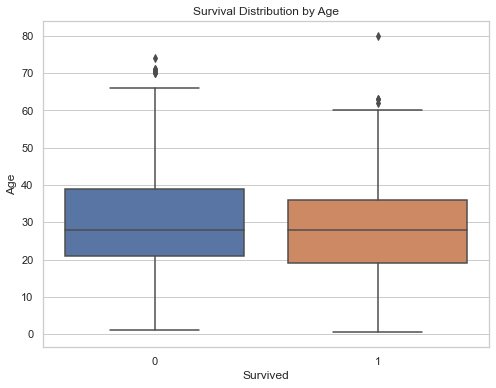

In [7]:
# Set the style
sns.set(style="whitegrid")

# Create the box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)

# Add title and labels
plt.title('Survival Distribution by Age')
plt.xlabel('Survived')
plt.ylabel('Age')

# Show the plot
plt.show()

In [8]:
df['Sex'] = df['Sex'].replace(['male'], 1)
df['Sex'] = df['Sex'].replace(['female'], 2)
df['Embarked'] = df['Embarked'].replace(['C'], 1)
df['Embarked'] = df['Embarked'].replace(['S'], 2)
df['Embarked'] = df['Embarked'].replace(['Q'], 3)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [9]:
X = df[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y = df['Survived']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.25, random_state = 42)

In [11]:
#feature selection

# Initialize the feature selector
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features

# Fit the selector on the training data and transform both training and testing data
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]
selected_features

Index(['Pclass', 'Sex', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [12]:
#classification
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_selected, Y_train,)

DecisionTreeClassifier()

In [13]:
# For classification:
predicted_labels = decision_tree_classifier.predict(X_test_selected)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.7752808988764045


In [15]:
test['Sex'] = test['Sex'].replace(['male'], 1)
test['Sex'] = test['Sex'].replace(['female'], 2)
test['Embarked'] = test['Embarked'].replace(['C'], 1)
test['Embarked'] = test['Embarked'].replace(['S'], 2)
test['Embarked'] = test['Embarked'].replace(['Q'], 3)
test['Fare'] = test['Fare'].fillna(40.98)
test['Age'] = test['Age'].fillna(30.27)
X_test1 = test[['Pclass','Sex','Parch','Fare','Embarked']]
predictions = decision_tree_classifier.predict(X_test1)


/Users/jahnavinaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [16]:
#found mean of all fares to replace 1 missing fare value
#test = test.dropna(subset=['Fare'])
#average = test['Fare'].mean()
#average = 40.98208731117823

#found mean of all ages to replace 86 missing age values
#test = test.dropna(subset=['Age'])
#average = test['Age'].mean()
#average = 30.272590361445783

In [17]:
results = pd.DataFrame({'PassengerId': test['PassengerId'],'Survived': predictions})
results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [18]:
results.to_csv('output.csv', index= False)